#### Profesor: Gonzalo Acuña L. Ayudante: Ignacio Ibañez
#### Alumno: Diego Polanco B. Rut: 18.662.203-0


# Parte 1: Funciones de activación


El principal propósito de la Función de Activación de un nodo radica en definir la salida de éste, dada una entrada en específico o ya sea un conjunto de entradas. Tiene un funcionamiento similar al del perceptron, detallado en la experiencia anterior. En el presente laboratorio se solicitó realizar en primera instancia una función de transferencia lineal y una de carácter no lineal. Por lo que se escogió implementar la función ReLU (unidad lineal rectificada) como una función de transferencia lineal y la función de tangente hiperbolica como una función de transferencia no lineal.


### Función de transferencia lineal (ReLU)

ReLU, rectificador o unidad lineal rectificada (Rectified Linear Unit) corresponde a una función real de un solo argumento, continua y diferenciable en todo su dominio, exceptuando el inicio de la rama.
Esta funcion de activación se define como f(x) = max(0,x), donde x pertenece a la entrada de la neurona. Esto quiere decir que la función toma un valor de 0 para entradas negativas y toma valores equivalentes a la entrada cuando son entradas 0 o positivas.
![ReLU](relu.png)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(([0,0], [0,1], [1,0], [1,1]), dtype=float)
y = np.array(([1], [1], [1], [0]), dtype=float)

Xtest = np.array(([0,0], [0,1], [1,0]), dtype=float)
ytest = np.array(([1], [1], [1]), dtype=float)

X = X
y = y  

class ReLU(object):

    def __init__(self):
        return

    def relu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return x

    def drelu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return 1
    
    def function(self, x):
        x = np.vectorize(self.relu)(x)
        return x
    
    def derivate(self, x):
        x = np.vectorize(self.drelu)(x)
        return x



### Funcion de transferencia no lineal (Tanh)

Otra de las funciones de activación seleccionadas para su implementación, fue la tangente hiperbólica. La tangente hiperbólica o Tanh corresponde a una función real, continua y diferenciable, el cual se expressa como el cociente entre el seno hiperbólico y el coseno hiperbólico. ![Tangente hiperbolica](tanh.png) 
A su vez esta función se expresa en funciones exponenciales de bases irracionales e y exponente x.![Tangente hiperbolica](tanh1.png) ![Tangente hiperbolica](tangenteh.png)

In [0]:
class Tanh(object):
    def __init__(self):
        return
    
    def function(self, x):
        return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    
    def derivate(self, x):
        return 4/((np.exp(x)+np.exp(-x))**2)        
        

# Parte 2: Funciones objetivo

Las funciones objetivo representa que tan lejos se encuentran las predicciones realizadas de la solución optima al problema a resolver. Permite expresar exactamente que tan costoso es nuestro modelo realizado. Para la realización de este laboratorio se implementaron dos funciones de costo u objetivo, las cuales son la función de error absoluto medio y la función de error cuadrático medio.
El error absoluto medio permite calcular el promedio entre la distancia del valor predicho esperado y la salida obtenida. Esta función se representa matematicamente de la siguiente forma:![MAE](mae.png)
El error cuadratico medio corresponde a una estimación promedio de errores al cuadrado entre los valores predichos esperados y la salida obtenida. La ECM está dada por:![ECM](ecm.png)

In [0]:
def ECM(self, X, y):
    self.yHat = self.forward(X)
    J = (1/(self.inputLayerSize))*sum((y-self.yHat)**2)
    return J
    
def MAE(self, X, y):
    self.yHat = self.forward(X)
    J = (1/(self.inputLayerSize))*sum(abs(y-self.yHat))
    return J


# Parte 3: Red neuronal feed forward

Una red neuronal feed forward corresponde a la primera y más sencilla red neuronal ideada, ya que su funcionamiento se basa solamente en mover la información hacia adelante, sin realizar ninguna especie de ciclo. Dentro de este tipo de redes neuronales se pueden encontrar el perceptrón de una capa, el cual consta de una sola capa de nodos de entrada y una de nodos de salida, los cuales se encuentran directamente conectados mediante una serie de ponderaciones. Otra de las redes que corresponden al tipo feed forward son los perceptrones multicapa, en este caso consta de capas de entrada, de salida y capas ocultas. Esto permite resolver problemas que no son linealmente separables, el cual es la principal limitación del perceptron simple. En este caso la red multicapa puede ser totalmente o localmente conectada, la cual se diferencia por la cantidad de neuronas que son entradas para la siguiente capa.![Feed forward](feed.gif)
A continuación se presentan dos redes neuronales, las cuales se componen por las distintas funciones objetivo mencionadas anteriormente.


In [0]:
class Neural_NetworkMSE(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

class Neural_NetworkAE(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum(abs(y-self.yHat))
        return J

    def dabs(self, y, yHat):
        if y > yHat:
            return 0
        if y < yHat:
            return 1
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        v = np.vectorize(self.dabs)(y,self.yHat)
        
        delta3 = np.multiply(-(v), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad     

# Parte 4: Entrenamiento Red neuronal feedforward

A continuación se realiza el entrenamiento de la red neuronal elaborada, mediante a las funciones de activación mencionadas con anterioridad.

Optimization terminated successfully.
         Current function value: 0.500000
         Iterations: 107
         Function evaluations: 142
         Gradient evaluations: 142


Text(0,0.5,'Cost')

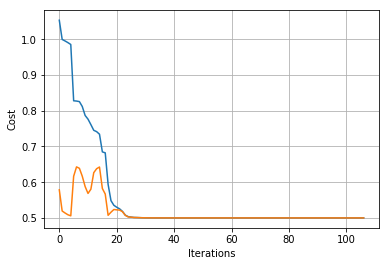

In [0]:
from scipy import optimize


class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res



T = Tanh()
#R = ReLU()
NN = Neural_NetworkMSE(2, 1, 3, T) 
#NN2 = Neural_NetworkAE(2, 1, 3, T) 
T = trainer(NN)
T.train(X,y, Xtest, ytest)
#T2 = trainer(NN2)
#T2.train(X,y, Xtest, ytest)


plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')


# Análisis de resultados

En el ejercicio anterior se busca evaluar las distintas redes neuoronales realizadas con las funciones objetivos basadas en el error absoluto medio y la función de error cuadrático medio. Además se utilizaron las funciones de activación ReLU y la tangente hiperbolica, realizando todas las combinaciones. Como se puede apreciar en el grafico anterior, el modelo necesita de pocas iteraciones para aproximarse a la función de costo deseada. Luego de esto la red sigue iterando sin variar el valor del costo.

# Parte 5: Dataset Load Breast Cancer

Se escogió el dataset "load_breast_cancer", el cual entrega 569 casos de personas con tumores mamarios y posee 2 clases, benigno y maligno. Dentro de estos 569 casos, 212 son del tipo maligno y 357 del tipo benigno. Este dataset contiene una dimensionalidad de 30 caracteristicas por cada caso analizado.

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

cancer = load_breast_cancer()
x_entrenamiento = cancer.data
y = cancer.target
y_entrenamiento = np.zeros([len(y), 3])

for i in range(len(y)):    
	y_entrenamiento[i][y[i]] = 1

#X = np.array(([0,0], [0,1], [1,0], [1,1]), dtype=float)
#y = np.array(([0], [1], [1], [1]), dtype=float)

x_entrenamiento = normalize(x_entrenamiento)
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x_entrenamiento, y_entrenamiento, test_size=0.3)
print('Tamaño entrenamiento: {train}, Tamaño test: {test}'.format(train=x_entrenamiento.shape[0], test=x_test.shape[0]))

#print(x_entrenamiento)
#print(y_entrenamiento)

Tamaño entrenamiento: 398, Tamaño test: 171


# Analisis comparativo

Como se explicó en el laboratorio anterior las Extreme Learning Machine o ELM son redes neuronales predictivas utilizadas para clasificación, regresión, clustering y aprendizaje de características con una más capas de nodos ocultos, entre otros. Comparado con las redes neuronales convencionales, alcanza una mayor velocidad de entrenamiento y resuelve de mejor manera los problemas de ajuste excesivo. Las ELM se basan en la minimización de riesgos y su proceso de aprendizaje solo necesita una iteración. El algoritmo evita múltiples iteraciones y minimización local. Siendo esta última característica la principal diferenciadora de las redes feed forward, ya que utiliza multiples iteraciones. Por lo que no se puede afirmar que una opción sea mejor que otra, ya que si bien puede que la red feed forward obtenga una mayor presición la mayoría de las veces, ocupa un mayor tiempo de computo, por lo que sería ideal para problemas que no manejen tantas variables. En cambio la ELM podría ser de mayor utilidad en problemas de mayor complejidad o con mayor cantidad de variables o neuronas, ya que solo necesita de una sola iteración.

# Conclusiones

En el presente laboratorio se puso en practica la elaboración de la red neuronal feed forward en base a distintas funciones de activación y funciones objetivo realizando una combinación de éstas. En primera instancia se implementaron una funcion de transferencia lineal (ReLU) y una funcion de transferencia no lineal (Tangente hiperbolica). A continuación se realizaron las funciones de coste u objetivo basadas en el error absoluto medio y en la función de error cuadrático medio. Siguiendo con la experiencia se elaboraron las redes neuronales propuestas con una unica capa oculta, en donde se debían probar con las compuertas logicas AND, OR y XOR.
Luego se solicitaba seleccionar el data set utilizado en el laboratorio 1, para luego normalizar los datos. En el laboratorio anterior se seleccionó un dataset, el cual evaluaba los tumores mamarios mediante a 30 caracteristicas. Es importante recalcar que existieron objetivos que no se pudieron realizar debido a que no se pudo superar los problemas que conllevaba la implementación de ellos.
En esta experiencia se aprendió que la red neuronal feed forward puede ser de gran utilidad para problemas que no manejen tantas variables, debido a que su tiempo de computo sería muy elevado. En el caso de manejar una gran cantidad de variables sería mejor ocupar una ELM.
En las siguientes experiencias se tiene el objetivo de seguir aplicando la teoria aprendida en clases, para aprender los pro y contra de utilizar las distintas redes neuronales. 